<a href="https://colab.research.google.com/github/sharonTum/afp-course2-traffic-light/blob/main/UP2547881_M34132_AFP_Coursework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AFP Coursework 2: Traffic Light Recognition
## Student ID: UP2547881




#1. Business Understanding

Highly accurate recognition of traffic lights is critical for Autonomous Vehicles

#2. Data Understanding

##2.1 Setup

In [ ]:
#Set random seeds
import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

SEED = 88
#os.environ['PYTHONHASHSEED'] = str(SEED)
#os.environ['TF_DETERMINISTIC_OPS'] = '1'
#os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

import numpy as np
import tensorflow as tf
import random

random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
#tf.keras.utils.set_random_seed(SEED)

print(f"Deterministic mode (seed={SEED})")


Deterministic mode (seed=88)


## 2.2 Import Libraries

In [ ]:
import seaborn as sns
#import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from pathlib import Path
import random
from typing import Tuple, List
import shutil

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,classification_report,accuracy_score, precision_score, recall_score, roc_auc_score

#Deep Learning
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import keras
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

#image
import imageio
#import imgaug.augmenters as iaa
import matplotlib.pyplot as plt

In [ ]:
#Declare variables, constants
TEST_RATIO = 0.2

input_shape = (150, 150, 3)
num_classes = 2


## 2.3 Clone Repository & Load Dataset from Github

In [ ]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
  print("Running in Colab")
  print("Cloning repository from Github...")

  #Remove existing directory
  !rm -rf afp-course2-traffic-light

  #clone repo
  !git clone https://github.com/sharonTum/afp-course2-traffic-light.git

  #change to repo dir
  %cd afp-course2-traffic-light

  print("Repository cloning done")

  #define dataset paths
  BASE_PATH = 'dataset'


else:
  print("Not running in Colab")
  print("Assuming repo already cloned...")

  #define dataset paths
  BASE_PATH = 'dataset'
  #TRAIN_PATH = os.path.join(BASE_PATH, 'train')
  #TEST_PATH = os.path.join(BASE_PATH, 'test')

#set image paths
GREEN_DIR = f'{BASE_PATH}/Green'
RED_DIR = f'{BASE_PATH}/Red'



Running in Colab
Cloning repository from Github...
Cloning into 'afp-course2-traffic-light'...
remote: Enumerating objects: 217, done.
remote: Counting objects: 100% (217/217), done.
remote: Compressing objects: 100% (214/214), done.
remote: Total 217 (delta 2), reused 209 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (217/217), 30.82 MiB | 24.64 MiB/s, done.
Resolving deltas: 100% (2/2), done.
/content/afp-course2-traffic-light
Repository cloning done


# 3. Data Preparation

In [ ]:
TRAIN_PATH = os.path.join(BASE_PATH, 'train')
TEST_PATH = os.path.join(BASE_PATH, 'test')
TRAIN_GREEN_DIR = f'{BASE_PATH}/train/Green'
TRAIN_RED_DIR = f'{BASE_PATH}/train/Red'
TEST_GREEN_DIR = f'{BASE_PATH}/test/Green'
TEST_RED_DIR = f'{BASE_PATH}/test/Red'

def setup_directories():
    for path in [TRAIN_GREEN_DIR, TRAIN_RED_DIR, TEST_GREEN_DIR, TEST_RED_DIR]:
        if not os.path.exists(path):
            os.makedirs(path)

setup_directories()

# Verify paths
for path, name in [(TRAIN_GREEN_DIR, 'Training Green'), (TRAIN_GREEN_DIR, 'Training Red'),
                   (TEST_GREEN_DIR, 'Test Green'), (TEST_RED_DIR, 'Test Red')]:
    if os.path.exists(path):
        count = len(os.listdir(path))
        print(f'{name}: {count} images found')
    else:
        print(f'{name}: Path not found - {path}')

Training Green: 0 images found
Training Red: 0 images found
Test Green: 0 images found
Test Red: 0 images found


##3.1 Data Pre-processing

In [ ]:
X = [] #Training data as np.array
Z = [] #Training Labels
TX = [] #Test data as np.array
TZ = [] #Test Labels

IMG_SIZE = 150

In [ ]:
def make_image_list(label, DIR):

    print('print DIR:',DIR, "label:", label)

    #lloop through the images
    for img in os.listdir(DIR):

        #label = traffic_type
        path = os.path.join(DIR, img)
        #print(path)

        img = cv2.imread(path, cv2.IMREAD_COLOR)

        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        #Add to images data as np.array
        X.append(np.array(img))

        #Add to training label
        Z.append(str(label))

In [ ]:
make_image_list('Green', GREEN_DIR)

print DIR: dataset/Green label: Green


In [ ]:
make_image_list('Red', RED_DIR)

print DIR: dataset/Red label: Red


In [ ]:
print(len(X))
print(len(Z))

200
200


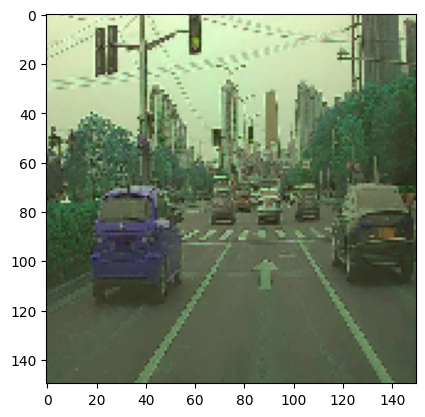

In [ ]:
plt.imshow(X[1])

In [ ]:
#plt.imshow(TX[1])
#print(TZ[1])

In [ ]:
print(Z[1])
print(Z[len(Z)-1])

Green
Red


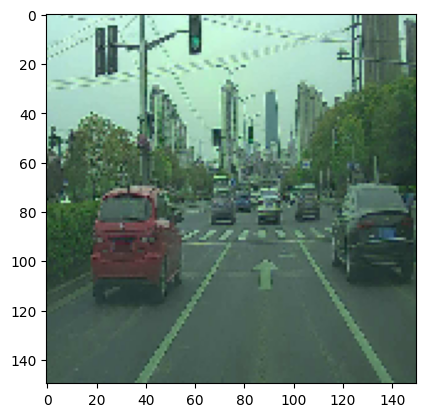

In [ ]:
plt.imshow(X[1][:,:,::-1])

In [ ]:
le = LabelEncoder()
print(Z)

Y = le.fit_transform(Z)
Y = to_categorical(Y, 2) #convert to binary class
print(Y)

#converts to single, consolidated Numpy array
X = np.array(X)

#image processing normalization. All pixels div 255 to bring value between 0 to 1.0
X = X/255

['Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', '

## 3.2 Splitting Train and Test Data

In [ ]:
#Splitting train-test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=SEED,
                                                    stratify = np.argmax(Y, axis=1))

print("=== Split Train-Test data ===\n")
print(f"Training set size: {x_train.shape[0]:,} consists of ({x_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set size: {x_test.shape[0]:,} consists of ({x_test.shape[0]/len(X)*100:.1f}%)")

print("\nTraining set class distribution:")
unique_train, counts_train = np.unique(np.argmax(y_train, axis=1), return_counts=True)
for i in unique_train:
  print(f"{le.inverse_transform([i])[0]}: {counts_train[i]} images")

print("\nTesting set class distribution:")
unique_test, counts_test = np.unique(np.argmax(y_test, axis=1), return_counts=True)
for i in unique_test:
  print(f"{le.inverse_transform([i])[0]}: {counts_test[i]} images")

#Final set should give 80% training, 20% test data
print(f"\nx_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

print(f"y_test shape: {y_test.shape}")

TX = x_test[1:6].copy()
TZ = y_test[1:6].copy()

=== Split Train-Test data ===

Training set size: 160 consists of (80.0%)
Testing set size: 40 consists of (20.0%)

Training set class distribution:
Green: 80 images
Red: 80 images

Testing set class distribution:
Green: 20 images
Red: 20 images

x_train shape: (160, 150, 150, 3)
x_test shape: (40, 150, 150, 3)
y_test shape: (40, 2)


In [ ]:
'''
import numpy as np

# Check class balance in training data
y_classes = np.argmax(y_train, axis=1)
print("Class distribution:")
print(f"  Class 0 (Green):   {np.sum(y_classes == 0)} samples")
print(f"  Class 1 (Red): {np.sum(y_classes == 1)} samples")

# Check last 10% (your validation split)
val_size = int(len(y_train) * 0.1)
y_val = y_train[-val_size:]
y_val_classes = np.argmax(y_val, axis=1)
print("\nValidation split (last 10%):")
print(f"  Class 0 (Green):   {np.sum(y_val_classes == 0)} samples")
print(f"  Class 1 (Red): {np.sum(y_val_classes == 1)} samples")

if len(np.unique(y_val_classes)) < 2:
    print("\n⚠️  PROBLEM FOUND: Validation has only ONE class!")
    print("    This is why val_accuracy = 0.5")
    '''

'\nimport numpy as np\n\n# Check class balance in training data\ny_classes = np.argmax(y_train, axis=1)\nprint("Class distribution:")\nprint(f"  Class 0 (Green):   {np.sum(y_classes == 0)} samples")\nprint(f"  Class 1 (Red): {np.sum(y_classes == 1)} samples")\n\n# Check last 10% (your validation split)\nval_size = int(len(y_train) * 0.1)\ny_val = y_train[-val_size:]\ny_val_classes = np.argmax(y_val, axis=1)\nprint("\nValidation split (last 10%):")\nprint(f"  Class 0 (Green):   {np.sum(y_val_classes == 0)} samples")\nprint(f"  Class 1 (Red): {np.sum(y_val_classes == 1)} samples")\n\nif len(np.unique(y_val_classes)) < 2:\n    print("\n⚠️  PROBLEM FOUND: Validation has only ONE class!")\n    print("    This is why val_accuracy = 0.5")\n    '

##3.2 Data Augmentation

In [ ]:
'''
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(150,
                                  150,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)
'''

'\ndata_augmentation = keras.Sequential(\n  [\n    layers.RandomFlip("horizontal",\n                      input_shape=(150,\n                                  150,\n                                  3)),\n    layers.RandomRotation(0.1),\n    layers.RandomZoom(0.1),\n  ]\n)\n'

In [ ]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.01),
    layers.RandomZoom(0.01),
], name='data_augmentation')

In [ ]:
data_augmentation_light = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.005)#,
    #layers.RandomZoom(0.005),
], name="aug_light")

In [ ]:
#data_augmentation_light = tf.keras.Sequential([], name="aug_none")


# Baseline Modeling

##4.1 Architecture

In [ ]:
# Set random seeds for consistency
tf.random.set_seed(SEED)
np.random.seed(SEED)

baseline_model = tf.keras.models.Sequential([
    tf.keras.Input(shape=x_train.shape[1:]),
    data_augmentation,
    tf.keras.layers.Conv2D(32, 2, activation='relu'), #32 conv filters, 2x2 kernel
    tf.keras.layers.MaxPooling2D(), #Downsamples
    tf.keras.layers.Flatten(), #Convert 2D to 1D
    tf.keras.layers.Dense(128, activation='relu'), #Fully-connected 128 neurons
    tf.keras.layers.Dropout(0.2), #De-activate neurons
    tf.keras.layers.Dense(2, activation='softmax'), #Final classification scores
])

baseline_model.compile(optimizer='Adam', loss='CategoricalCrossentropy',
                       metrics=['accuracy'])

baseline_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 149, 149, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 175232)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    22,429,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,430,498 (85.57 MB)

 Trainable params: 22,430,498 (85.57 MB)

 Non-trainable params: 0 (0.00 B)

## 4.2 Training

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)]

cnn_baseline_history = baseline_model.fit(x_train, y_train,  epochs = 100,
                    validation_split=0.1,
                    callbacks = callbacks, batch_size=40, shuffle=True, verbose=1,
                    )

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 214ms/step - accuracy: 0.4361 - loss: 7.2814 - val_accuracy: 0.5000 - val_loss: 6.7966
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.4825 - loss: 7.8341 - val_accuracy: 0.5000 - val_loss: 2.6946
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4744 - loss: 4.1668 - val_accuracy: 0.5000 - val_loss: 3.4416
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5206 - loss: 3.8756 - val_accuracy: 0.5000 - val_loss: 3.1659
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5450 - loss: 2.6623 - val_accuracy: 0.5000 - val_loss: 3.0446
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5806 - loss: 1.8468 - val_accuracy: 0.5000 - val_loss: 1.6157
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5444 - loss: 1.9075 - val_accuracy: 0.6250 - val_loss: 0.7953
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6244 - loss: 1.0119 - val_accuracy: 0.6250 - val_loss

## 4.3 Scores

In [ ]:
def display_scores(model, x_test, y_test, model_history, model_name="Model"):
  y_pred_probs = model.predict(x_test)

  print(f"Shape of y_test: {y_test.shape}")
  print(f"Shape of y_pred_probs: {y_pred_probs.shape}")

  # Compare true class indices with predicted class indices
  y_true_classes = np.argmax(y_test, axis=1)
  y_pred_classes = np.argmax(y_pred_probs, axis=1)

  print(f"Shape of y_true_classes: {y_true_classes.shape}")
  print(f"Shape of y_pred_classes: {y_pred_classes.shape}")

  cnn_results = {
      'Model': model_name,
      'Accuracy': accuracy_score(y_true_classes, y_pred_classes),
      'Precision': precision_score(y_true_classes, y_pred_classes, zero_division=0),
      'Recall': recall_score(y_true_classes, y_pred_classes, zero_division=0),
      'F1_Score': f1_score(y_true_classes, y_pred_classes, zero_division=0, average="weighted"),
      'ROC_AUC': roc_auc_score(y_test, y_pred_probs), # For ROC_AUC, y_test (one-hot) and y_pred_probs (probabilities) are expected
      'Model_Object': model_history
  }

  print(f'\n{"="*70}')
  print(f"Fitting {model_name}...")
  print(f'{"="*70}')
  print(f'Accuracy:  {cnn_results["Accuracy"]:.4f}')
  print(f'Precision:  {cnn_results["Precision"]:.4f}')
  print(f'Recall:    {cnn_results["Recall"]:.4f}')
  print(f'F1-Score:  {cnn_results["F1_Score"]:.4f}')
  print(f'ROC_AUC:  {cnn_results["ROC_AUC"]:.4f}')

  return cnn_results

In [ ]:
 cnn_baseline_results = display_scores(baseline_model, x_test, y_test, cnn_baseline_history, "Baseline Model")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Shape of y_test: (40, 2)
Shape of y_pred_probs: (40, 2)
Shape of y_true_classes: (40,)
Shape of y_pred_classes: (40,)

Fitting Baseline Model...
Accuracy:  0.6750
Precision:  0.7059
Recall:    0.6000
F1-Score:  0.6732
ROC_AUC:  0.7625


In [ ]:
#Display Epoch Metrics
import pandas as pd

def display_epoch_history(lmodel_history, model_name="Model"):
  epoch_df = pd.DataFrame({
      "Epoch": range(1, len(lmodel_history.history["loss"]) + 1),
      "Train Loss": lmodel_history.history["loss"],
      "Validation Loss": lmodel_history.history["val_loss"],
      "Train Accuracy": lmodel_history.history.get("accuracy"),
      "Validation Accuracy": lmodel_history.history.get("val_accuracy")
  })
  epoch_df["Val Loss Change"] = epoch_df["Validation Loss"].diff()
  epoch_df["Train Loss Change"] = epoch_df["Train Loss"].diff()

  display(epoch_df.head(20))
  display(epoch_df.tail(20))

  return epoch_df

In [ ]:
epoch_baseline_df = display_epoch_history(cnn_baseline_history, "Baseline Model")

,Epoch,Train Loss,Validation Loss,Train Accuracy,Validation Accuracy,Val Loss Change,Train Loss Change
0,1,11.291092,6.796646,0.423611,0.5000,NaN,NaN
1,2,8.082966,2.694583,0.500000,0.5000,-4.102063,-3.208126
2,3,4.708010,3.441638,0.486111,0.5000,0.747056,-3.374956
3,4,3.472926,3.165855,0.555556,0.5000,-0.275783,-1.235084
4,5,2.553580,3.044609,0.541667,0.5000,-0.121246,-0.919346
5,6,1.532526,1.615687,0.597222,0.5000,-1.428922,-1.021054
6,7,1.762114,0.795285,0.569444,0.6250,-0.820402,0.229588
7,8,0.991146,0.806417,0.652778,0.6250,0.011132,-0.770968
8,9,0.864820,1.124170,0.659722,0.5625,0.317753,-0.126326
9,10,0.509858,1.207566,0.770833,0.5000,0.083397,-0.354962


,Epoch,Train Loss,Validation Loss,Train Accuracy,Validation Accuracy,Val Loss Change,Train Loss Change
7,8,0.991146,0.806417,0.652778,0.6250,0.011132,-0.770968
8,9,0.864820,1.124170,0.659722,0.5625,0.317753,-0.126326
9,10,0.509858,1.207566,0.770833,0.5000,0.083397,-0.354962
10,11,0.463442,1.000442,0.784722,0.5000,-0.207124,-0.046416
11,12,0.354937,1.433792,0.868056,0.5625,0.433350,-0.108505
12,13,0.369281,1.000096,0.833333,0.5625,-0.433697,0.014344
13,14,0.296470,0.948211,0.895833,0.5625,-0.051885,-0.072811
14,15,0.235262,1.002938,0.909722,0.5625,0.054727,-0.061208
15,16,0.187848,0.921912,0.958333,0.6875,-0.081026,-0.047415
16,17,0.157393,1.442533,0.937500,0.5000,0.520620,-0.030454


In [ ]:
print(len(cnn_baseline_history.history["loss"]))
print(cnn_baseline_history.history["loss"][:3])


27
[11.291091918945312, 8.082965850830078, 4.708010196685791]


In [ ]:
cnn_baseline_history.history["loss"][0], cnn_baseline_history.history["val_loss"][0]


(11.291091918945312, 6.7966461181640625)

## 4.4 Training and Validation Loss/Accuracy Plot

In [ ]:
#Plot training history
def plot_training_history(history, model_name="Model"):
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')

  plt.title(f"{model_name} Training History Loss")
  plt.ylabel('Loss')
  plt.xlabel('Epoch')

  plt.legend()
  plt.show()


  #Display the data table
  df = pd.DataFrame({
      "Epoch": range(1, len(history.history["loss"]) +1),
      "Training Loss": history.history["loss"],
      "Validation Loss": history.history["val_loss"],
  })
  display(df)


In [ ]:
#Plot accuracy
def plot_accuracy(history, model_name="Model"):
  plt.plot(history.history['accuracy'],label='Training Accuracy')
  plt.plot(history.history['val_accuracy'],label='Validation Accuracy')

  plt.title(f"{model_name} Training History Accuracy")
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(loc ='lower right')

  plt.show()

   #Display the data table
  df = pd.DataFrame({
      "Epoch": range(1, len(history.history["accuracy"]) +1),
      "Training Accuracy": history.history["accuracy"],
      "Validation Accuracy": history.history["val_accuracy"],
  })
  display(df)


In [ ]:
# create roc auc curve
def plot_roc_curve(y_test, y_pred_probs, model_name="Model"):

  from sklearn.metrics import roc_curve
  from sklearn.metrics import auc
  import matplotlib.pyplot as plt

  # Based on le.classes_['Green' 'Red'], index 1 corresponds to 'Red'.

  fpr, tpr, thresholds = roc_curve(y_test[:, 1], y_pred_probs[:, 1])
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f"{model_name} Receiver Operating Characteristic (ROC) Curve")
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
def display_accuracy_report(model_history, model_to_report, x_test, y_test, model_name):

  model_loss, model_accuracy = model_to_report.evaluate(x_test, y_test)

  best_train_accuracy = max(model_history.history['accuracy'])

  # Find the index
  best_val_accuracy_epoch_index = np.argmax(model_history.history['val_accuracy'])
  # epoch number is index + 1
  best_val_accuracy_epoch = best_val_accuracy_epoch_index + 1

  print(f"\n {model_name} Accuracy Report ")
  accuracy_df = pd.DataFrame({"Test Accuracy": [f"{model_accuracy:.4f}"],
                             "Best Training Accuracy": [f"{best_train_accuracy:.4f}"],
                            "Final Training Accuracy": [f"{model_history.history['accuracy'][-1]:.4f}"],
                            "Best Validation Accuracy": [f"{max(model_history.history['val_accuracy']):.4f}"],
                            "Epochs Trained": [f"{len(model_history.history['accuracy'])}"]
                            })
  display(accuracy_df)

  model_results = {
    'Model': model_name,
    'Test Accuracy': model_accuracy,
    'Best Training Accuracy': best_train_accuracy,
    'Final Training Accuracy': model_history.history['accuracy'][-1],
    'Best Validation Accuracy': max(model_history.history['val_accuracy']),
    'Epochs Trained': len(model_history.history['accuracy']),
  }

  return model_results

In [ ]:
baseline_accuracy_map = display_accuracy_report(cnn_baseline_history, baseline_model, x_test, y_test, "Baseline Model")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6792 - loss: 0.6354

 Baseline Model Accuracy Report 


,Test Accuracy,Best Training Accuracy,Final Training Accuracy,Best Validation Accuracy,Epochs Trained
0,0.6750,0.9931,0.9792,0.7500,27


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6792 - loss: 0.6354
[0.6489353179931641, 0.675000011920929]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
predicted label is  1
predicted label is  Red


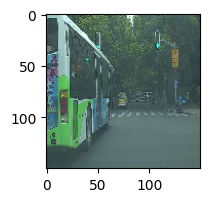

In [ ]:
loss_metric = baseline_model.evaluate(x_test,y_test)
print(loss_metric)

image_number = 12
plt.figure(figsize=(2,2))
plt.imshow(x_test[image_number][:,:,::-1])

predicted_label = pred = baseline_model.predict(x_test[image_number].reshape(1, 150, 150, 3))
print('predicted label is ',predicted_label.argmax())

predicted_class_index = predicted_label.argmax()
predicted_class_name = le.inverse_transform([predicted_class_index])
print('predicted label is ', predicted_class_name[0])

In [ ]:
print(f"Label mapping: {le.classes_}")

Label mapping: ['Green' 'Red']


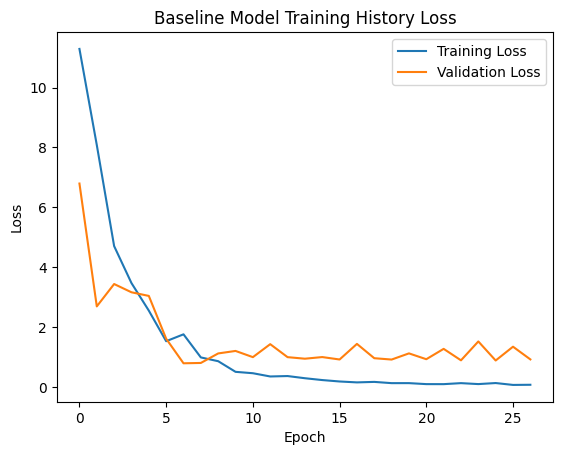

,Epoch,Training Loss,Validation Loss
0,1,11.291092,6.796646
1,2,8.082966,2.694583
2,3,4.708010,3.441638
3,4,3.472926,3.165855
4,5,2.553580,3.044609
5,6,1.532526,1.615687
6,7,1.762114,0.795285
7,8,0.991146,0.806417
8,9,0.864820,1.124170
9,10,0.509858,1.207566


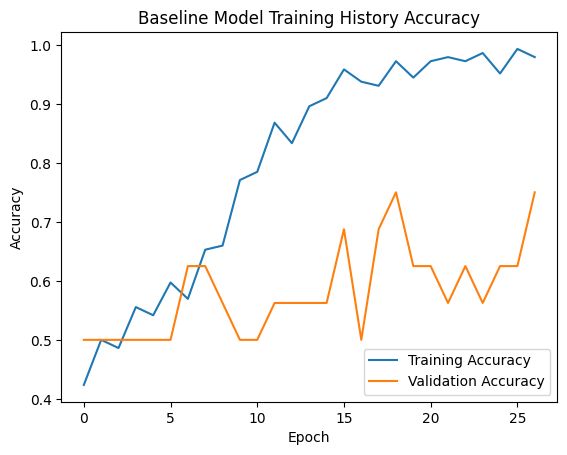

,Epoch,Training Accuracy,Validation Accuracy
0,1,0.423611,0.5000
1,2,0.500000,0.5000
2,3,0.486111,0.5000
3,4,0.555556,0.5000
4,5,0.541667,0.5000
5,6,0.597222,0.5000
6,7,0.569444,0.6250
7,8,0.652778,0.6250
8,9,0.659722,0.5625
9,10,0.770833,0.5000


In [ ]:
plot_training_history(cnn_baseline_history, "Baseline Model")
plot_accuracy(cnn_baseline_history, "Baseline Model")


## 4.5 Confusion Matrix

In [ ]:
#Confusion Matrix
def display_confusion_matrix(y_true_classes, y_pred_classes, model_name="Model", target_names=None):
  cm = confusion_matrix(y_true_classes, y_pred_classes)
  print('Confusion Matrix:')
  print(cm)
  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=target_names, yticklabels=target_names)
  plt.title(f"Confusion Matrix for {model_name}")
  plt.xlabel('Predicted Label')
  plt.ylabel('Actual Label')
  plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


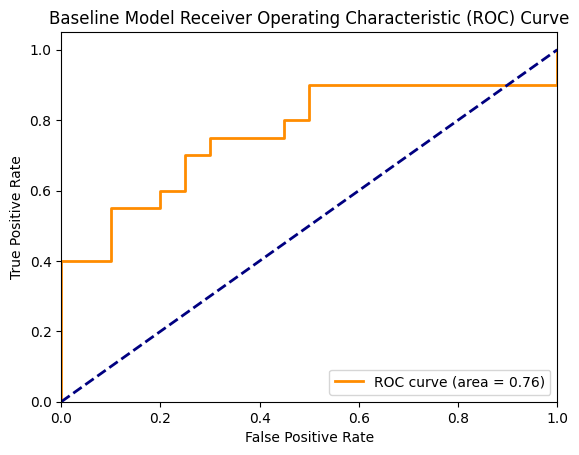

Confusion Matrix:
[[15  5]
 [ 8 12]]


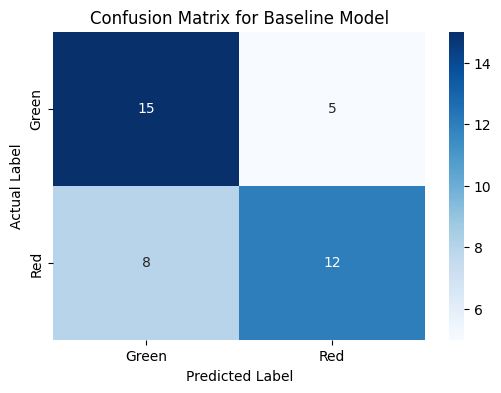

In [ ]:
#Predictions
# Get predictions for the entire test set using the model
y_pred_probs = baseline_model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Convert one-hot encoded y_test to class labels (0 or 1)
y_true_classes = np.argmax(y_test, axis=1)

plot_roc_curve(y_test, y_pred_probs, model_name="Baseline Model")

display_confusion_matrix(y_true_classes, y_pred_classes, model_name="Baseline Model", target_names=le.classes_)



In [ ]:
#Classification Report
print(classification_report(y_true_classes, y_pred_classes,
                            target_names=le.classes_))

print("Accuracy:", accuracy_score(y_true_classes, y_pred_classes))
print("F1_score:",f1_score(y_true_classes, y_pred_classes, average="weighted"))

F1_DL=f1_score(y_true_classes, y_pred_classes)

              precision    recall  f1-score   support

       Green       0.65      0.75      0.70        20
         Red       0.71      0.60      0.65        20

    accuracy                           0.68        40
   macro avg       0.68      0.68      0.67        40
weighted avg       0.68      0.68      0.67        40

Accuracy: 0.675
F1_score: 0.6731615336266499


# Predict 5 test images

##5.1 Print images with True and Predicted Labels

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

Predicted label for image 0: Green


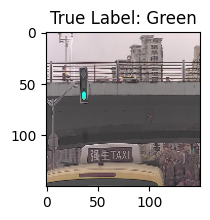

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

Predicted label for image 1: Red


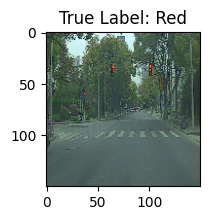

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

Predicted label for image 2: Green


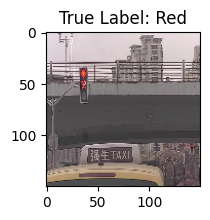

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Predicted label for image 3: Red


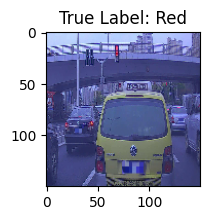

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Predicted label for image 4: Green


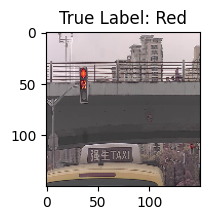

In [ ]:
#Loop from 0 to 5
for i in range(5):

    plt.figure(figsize=(2,2))
    plt.imshow(x_test[i][:,:,::-1])

    # Get the true class name from the one-hot encoded label
    true_class_index = np.argmax(y_test[i])
    true_class_name = le.inverse_transform([true_class_index])[0]

    plt.title(f"True Label: {true_class_name}")

    predicted_label = baseline_model.predict(x_test[i].reshape(1, 150, 150, 3))
    predicted_class_index = predicted_label.argmax()
    predicted_class_name = le.inverse_transform([predicted_class_index])

    print(f'\nPredicted label for image {i}: {predicted_class_name[0]}')
    plt.show()

#Improvements

## 6.1 Tuned Model 1 - GAP+Deeper Layers

### 6.1.1 Architecture

In [ ]:
from tensorflow.keras import Sequential, layers
import tensorflow as tf

# Set random seeds for consistency
tf.random.set_seed(SEED)
np.random.seed(SEED)

cnn_model_tuned1 = keras.Sequential([
    keras.Input(shape=(150, 150, 3)),
    data_augmentation_light,
    #layers.Rescaling(1./255),

    # Block 1
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', use_bias=False,
                  kernel_initializer=keras.initializers.GlorotUniform(seed=SEED)),
    #layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.10),

    # Block 2
    layers.Conv2D(64, (3, 3), padding='same', activation='relu', use_bias=False,
                  kernel_initializer=keras.initializers.GlorotUniform(seed=SEED)),
    #layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.15),

    # Block 3
    layers.Conv2D(128, (3, 3), padding='same', activation='relu', use_bias=False,
                  kernel_initializer=keras.initializers.GlorotUniform(seed=SEED)),
    #layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.20),

    # GAP
    layers.GlobalAveragePooling2D(),

    # Dense
    layers.Dense(128, activation='relu',
                 kernel_initializer=keras.initializers.GlorotUniform(seed=SEED)),
    layers.Dropout(0.30),
    layers.Dense(2, activation='softmax',
                 kernel_initializer=keras.initializers.GlorotUniform(seed=SEED))
], name='tuned_model_1')

cnn_model_tuned1.compile(optimizer=Adam(learning_rate=3e-4), loss='CategoricalCrossentropy', metrics=['accuracy'])

cnn_model_tuned1.summary()

Model: "tuned_model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ aug_light (Sequential)          │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 150, 150, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 75, 75, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 37, 37, 128)    │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,794 (428.88 KB)

 Trainable params: 109,794 (428.88 KB)

 Non-trainable params: 0 (0.00 B)

### 6.1.2 Training

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

callbacks = [
    EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    ]

cnn_tuned1_history = cnn_model_tuned1.fit(x_train, y_train,  epochs = 100,
                                          validation_split=0.1,
                                          callbacks = callbacks, verbose=1,
                                          batch_size=16, shuffle=True,
                    )


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.4710 - loss: 0.6976 - val_accuracy: 0.5000 - val_loss: 0.6944
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5374 - loss: 0.6911 - val_accuracy: 0.5000 - val_loss: 0.6946
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5441 - loss: 0.6907 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5598 - loss: 0.6917 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4760 - loss: 0.6958 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5365 - loss: 0.6917 - val_accuracy: 0.4375 - val_loss: 0.6926
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5058 - loss: 0.6938 - val_accuracy: 0.5625 - val_loss: 0.6922
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5572 - loss: 0.6861 - val_accuracy: 0.6250 - val_loss:

### 6.1.3 Scores

In [ ]:
epoch_tuned1_df = display_epoch_history(cnn_tuned1_history, "Tuned Model 1")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(epoch_tuned1_df)
# Reset options to default if desired after displaying
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

,Epoch,Train Loss,Validation Loss,Train Accuracy,Validation Accuracy,Val Loss Change,Train Loss Change
0,1,0.698361,0.694355,0.465278,0.5000,NaN,NaN
1,2,0.692534,0.694590,0.506944,0.5000,0.000235,-0.005827
2,3,0.691557,0.693845,0.520833,0.5000,-0.000745,-0.000977
3,4,0.691831,0.693150,0.555556,0.5000,-0.000695,0.000274
4,5,0.695551,0.693060,0.458333,0.5000,-0.000089,0.003720
5,6,0.691253,0.692579,0.527778,0.4375,-0.000481,-0.004298
6,7,0.692377,0.692222,0.520833,0.5625,-0.000357,0.001124
7,8,0.686428,0.691469,0.569444,0.6250,-0.000752,-0.005949
8,9,0.686574,0.691001,0.569444,0.5000,-0.000469,0.000145
9,10,0.684550,0.690588,0.541667,0.4375,-0.000413,-0.002024


,Epoch,Train Loss,Validation Loss,Train Accuracy,Validation Accuracy,Val Loss Change,Train Loss Change
73,74,0.357394,0.747806,0.916667,0.5625,0.167958,-0.047911
74,75,0.364193,0.816156,0.895833,0.5625,0.068350,0.006799
75,76,0.385854,0.620703,0.861111,0.6875,-0.195453,0.021662
76,77,0.387187,0.619066,0.895833,0.6875,-0.001637,0.001333
77,78,0.360616,0.707823,0.902778,0.6875,0.088757,-0.026571
78,79,0.336637,0.728774,0.916667,0.6250,0.020950,-0.023979
79,80,0.365580,0.670390,0.881944,0.6875,-0.058384,0.028943
80,81,0.346273,0.644255,0.916667,0.6875,-0.026135,-0.019307
81,82,0.343173,0.690438,0.909722,0.6875,0.046184,-0.003100
82,83,0.375055,0.612661,0.902778,0.6875,-0.077777,0.031882


,Epoch,Train Loss,Validation Loss,Train Accuracy,Validation Accuracy,Val Loss Change,Train Loss Change
0,1,0.698361,0.694355,0.465278,0.5000,NaN,NaN
1,2,0.692534,0.694590,0.506944,0.5000,0.000235,-0.005827
2,3,0.691557,0.693845,0.520833,0.5000,-0.000745,-0.000977
3,4,0.691831,0.693150,0.555556,0.5000,-0.000695,0.000274
4,5,0.695551,0.693060,0.458333,0.5000,-0.000089,0.003720
5,6,0.691253,0.692579,0.527778,0.4375,-0.000481,-0.004298
6,7,0.692377,0.692222,0.520833,0.5625,-0.000357,0.001124
7,8,0.686428,0.691469,0.569444,0.6250,-0.000752,-0.005949
8,9,0.686574,0.691001,0.569444,0.5000,-0.000469,0.000145
9,10,0.684550,0.690588,0.541667,0.4375,-0.000413,-0.002024


In [ ]:
#Quantitative Analysis for Training-Validation Gap(Overfitting)
def get_train_val_gap(model_history, model_name):
  print(f"\n=== {model_name} ===")
  train_acc = model_history.history["accuracy"]
  val_acc = model_history.history["val_accuracy"]

  accuracy_gap = np.array(train_acc) - np.array(val_acc)
  mean_gap = np.mean(accuracy_gap)

  print("Mean accuracy gap:", mean_gap)

get_train_val_gap(cnn_baseline_history, "Baseline Model")
get_train_val_gap(cnn_tuned1_history, "Tuned Model 1")


=== Baseline Model ===
Mean accuracy gap: 0.21990740519982796

=== Tuned Model 1 ===
Mean accuracy gap: 0.1816009549043512


In [ ]:
#Quantitative Analysis for Validation Stability
def get_val_loss_std(model_history, model_name):
  print(f"\n=== {model_name} ===")
  val_loss = model_history["Validation Loss"]
  best_epoch = np.argmin(val_loss) + 1

  print("Best epoch (min val loss):", best_epoch)
  print("Corresponding val_loss:", val_loss[best_epoch - 1])

  late_val_loss = val_loss[best_epoch:]
  #print("Post-Convolutional Validation Loss:", late_val_loss)

  late_std = np.std(late_val_loss)
  print("Standard Deviation of Validation Loss:", late_std)

  val_loss_diff = model_history["Val Loss Change"][best_epoch:]
  abs_val_loss_diff = np.abs(val_loss_diff)
  mean_abs_val_loss_change = np.mean(abs_val_loss_diff)
  print("Mean absolute val loss:", mean_abs_val_loss_change)

get_val_loss_std(epoch_baseline_df, "Baseline Model")
get_val_loss_std(epoch_tuned1_df, "Tuned Model 1")


=== Baseline Model ===
Best epoch (min val loss): 7
Corresponding val_loss: 0.7952851057052612
Standard Deviation of Validation Loss: 0.20945311016788903
Mean absolute val loss: 0.2998776018619537

=== Tuned Model 1 ===
Best epoch (min val loss): 73
Corresponding val_loss: 0.5798478126525879
Standard Deviation of Validation Loss: 0.05070088777632223
Mean absolute val loss: 0.05042823553085327


In [ ]:
cnn_tuned1_results = display_scores(cnn_model_tuned1, x_test, y_test, cnn_tuned1_history, "Tuned Model 1")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Shape of y_test: (40, 2)
Shape of y_pred_probs: (40, 2)
Shape of y_true_classes: (40,)
Shape of y_pred_classes: (40,)

Fitting Tuned Model 1...
Accuracy:  0.8250
Precision:  0.9333
Recall:    0.7000
F1-Score:  0.8222
ROC_AUC:  0.9575


In [ ]:
test_loss, test_acc = cnn_model_tuned1.evaluate(x_test, y_test, verbose=1)
print("Tuned Model 1 test accuracy:", test_acc)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8313 - loss: 0.3226 
Tuned Model 1 test accuracy: 0.824999988079071


In [ ]:
tuned1_accuracy_map = display_accuracy_report(cnn_tuned1_history, cnn_model_tuned1, x_test, y_test, "Tuned Model 1")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8313 - loss: 0.3226

 Tuned Model 1 Accuracy Report 


,Test Accuracy,Best Training Accuracy,Final Training Accuracy,Best Validation Accuracy,Epochs Trained
0,0.8250,0.9167,0.9028,0.7500,93


### 6.1.4 Plots

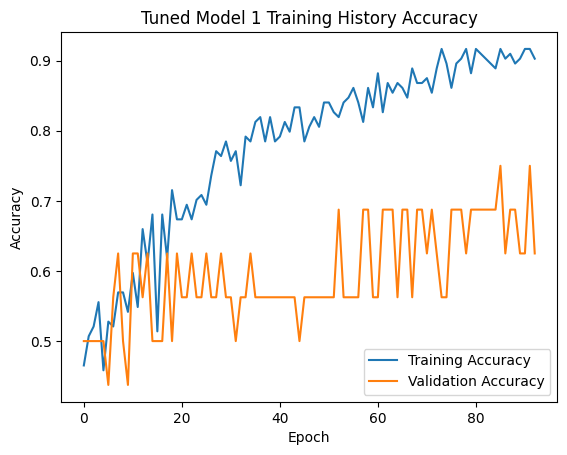

,Epoch,Training Accuracy,Validation Accuracy
0,1,0.465278,0.5000
1,2,0.506944,0.5000
2,3,0.520833,0.5000
3,4,0.555556,0.5000
4,5,0.458333,0.5000
...,...,...,...
88,89,0.895833,0.6875
89,90,0.902778,0.6250
90,91,0.916667,0.6250
91,92,0.916667,0.7500


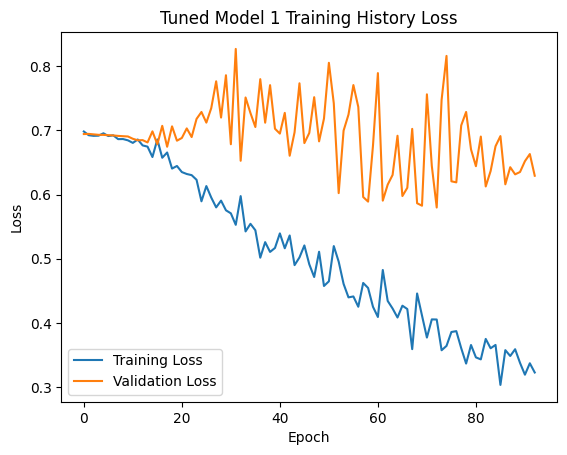

,Epoch,Training Loss,Validation Loss
0,1,0.698361,0.694355
1,2,0.692534,0.694590
2,3,0.691557,0.693845
3,4,0.691831,0.693150
4,5,0.695551,0.693060
...,...,...,...
88,89,0.359005,0.631559
89,90,0.337667,0.635219
90,91,0.319301,0.652088
91,92,0.337119,0.663184


In [ ]:
plot_accuracy(cnn_tuned1_history, "Tuned Model 1")
plot_training_history(cnn_tuned1_history, "Tuned Model 1")



### 6.1.5 Confusion Matrix

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Shape of y_test: (40, 2)
Shape of y_pred_probs: (40, 2)
Shape of y_true_classes: (40,)
Shape of y_pred_classes: (40,)


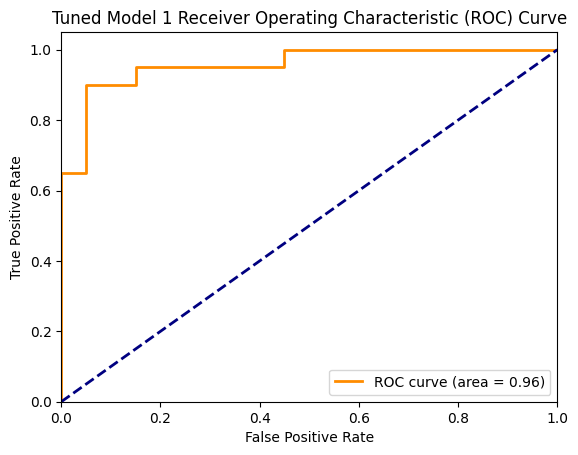

Confusion Matrix:
[[19  1]
 [ 6 14]]


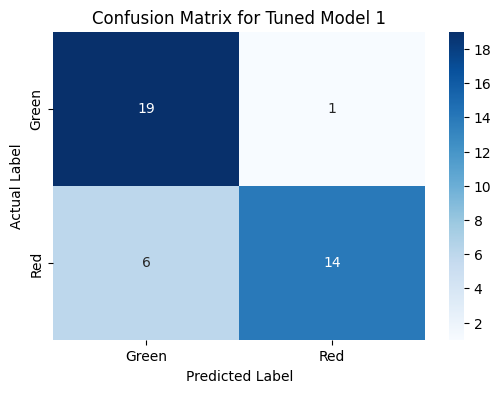

In [ ]:
#Predictions
# Get predictions for the entire test set using the model
y_pred_probs_tuned1 = cnn_model_tuned1.predict(x_test)
y_pred_classes_tuned1 = np.argmax(y_pred_probs_tuned1, axis=1)

print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_pred_probs: {y_pred_probs_tuned1.shape}")

# Convert one-hot encoded y_test to class labels (0 or 1)
y_true_classes_tuned1 = np.argmax(y_test, axis=1)

print(f"Shape of y_true_classes: {y_true_classes_tuned1.shape}")
print(f"Shape of y_pred_classes: {y_pred_classes_tuned1.shape}")

plot_roc_curve(y_test, y_pred_probs_tuned1, "Tuned Model 1")

display_confusion_matrix(y_true_classes_tuned1, y_pred_classes_tuned1, "Tuned Model 1", target_names=le.classes_)

In [ ]:
#Classification Report
print(classification_report(y_true_classes_tuned1, y_pred_classes_tuned1,
                            target_names=le.classes_))

print("Accuracy:", accuracy_score(y_true_classes_tuned1, y_pred_classes_tuned1))
print("F1_score:",f1_score(y_true_classes_tuned1, y_pred_classes_tuned1, average="weighted"))

              precision    recall  f1-score   support

       Green       0.76      0.95      0.84        20
         Red       0.93      0.70      0.80        20

    accuracy                           0.82        40
   macro avg       0.85      0.82      0.82        40
weighted avg       0.85      0.82      0.82        40

Accuracy: 0.825
F1_score: 0.8222222222222222


## 6.2 Tuned Model 2 - Transfer Learning - VGG

In [ ]:
from keras.applications import VGG16

#Load pre-trained VGG
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

### 6.2.1 Architecture

In [ ]:
#for layer in conv_base.layers:
#    layer.trainable = False
for layer in conv_base.layers[:-4]: #freeze the first 15 layers
    layer.trainable = False
for layer in conv_base.layers[-4:]: #train the last 4 layers for traffic lights
    layer.trainable = True

model_vgg = Sequential()
model_vgg.add(data_augmentation)
model_vgg.add(conv_base)
model_vgg.add(GlobalAveragePooling2D())

# Deeper classifier
model_vgg.add(Dense(256, activation='relu'))
model_vgg.add(BatchNormalization())
model_vgg.add(Dropout(0.5))

model_vgg.add(Dense(128, activation='relu'))
model_vgg.add(BatchNormalization())
model_vgg.add(Dropout(0.3))

model_vgg.add(Dense(2, activation='softmax'))

model_vgg.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model_vgg.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,880,706 (56.77 MB)

 Trainable params: 7,244,674 (27.64 MB)

 Non-trainable params: 7,636,032 (29.13 MB)

### 6.2.2 Training

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=10,
        min_lr=1e-7,
        verbose=1
    )
]

vgg_history = model_vgg.fit(x_train, y_train, epochs = 100,
                            validation_split=0.1,
                            batch_size=40, shuffle=True,
                            #validation_data=(x_val, y_val),
                            callbacks=callbacks)




Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5811 - loss: 0.9691 - val_accuracy: 0.5000 - val_loss: 0.7363 - learning_rate: 1.0000e-04
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.7089 - loss: 0.6316 - val_accuracy: 0.5000 - val_loss: 0.7296 - learning_rate: 1.0000e-04
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.7689 - loss: 0.5712 - val_accuracy: 0.5000 - val_loss: 0.7643 - learning_rate: 1.0000e-04
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.8292 - loss: 0.5039 - val_accuracy: 0.5000 - val_loss: 0.8260 - learning_rate: 1.0000e-04
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 0.8372 - loss: 0.3502 - val_accuracy: 0.5000 - val_loss: 0.8204 - learning_rate: 1.0000e-04
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.8603 - loss: 0.3168 - val_accuracy: 0.5000 - val_loss: 0.7643 - learning_rate: 1.0000e-04
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.9122 - 

### 6.2.3 Scores

In [ ]:
cnn_vgg_results = display_scores(model_vgg, x_test, y_test, vgg_history, "Tuned Model 2")


1/2 ━━━━━━━━━━━━━━━━━━━━ 1s 2s/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 844ms/step
Shape of y_test: (40, 2)
Shape of y_pred_probs: (40, 2)
Shape of y_true_classes: (40,)
Shape of y_pred_classes: (40,)

Fitting Tuned Model 2...
Accuracy:  0.9500
Precision:  1.0000
Recall:    0.9000
F1-Score:  0.9499
ROC_AUC:  0.9825


In [ ]:
vgg_accuracy_map = display_accuracy_report(vgg_history, model_vgg, x_test, y_test, "Tuned Model 2")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9563 - loss: 0.2182

 Tuned Model 2 Accuracy Report 


,Test Accuracy,Best Training Accuracy,Final Training Accuracy,Best Validation Accuracy,Epochs Trained
0,0.9500,1.0000,1.0000,0.8750,56


### 6.2.4 Plots

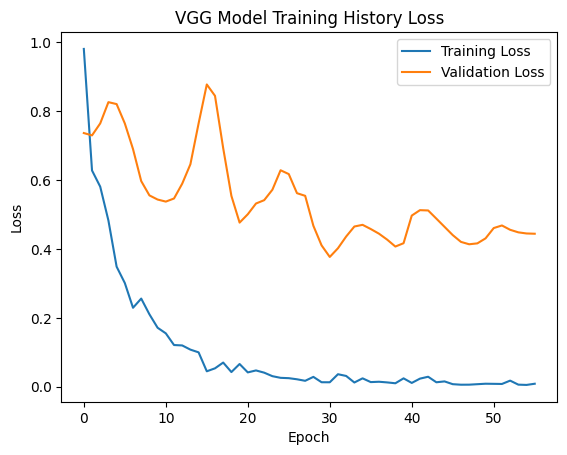

,Epoch,Training Loss,Validation Loss
0,1,0.980576,0.736327
1,2,0.627695,0.729560
2,3,0.580667,0.764333
3,4,0.482394,0.826036
4,5,0.348449,0.820411
5,6,0.300956,0.764302
6,7,0.229116,0.689847
7,8,0.255783,0.596903
8,9,0.210186,0.555372
9,10,0.171101,0.543317


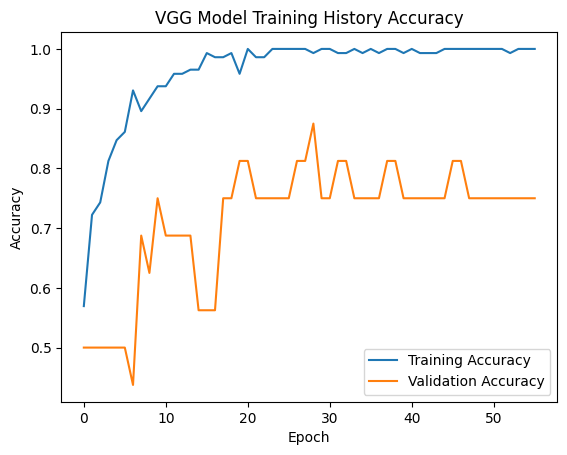

,Epoch,Training Accuracy,Validation Accuracy
0,1,0.569444,0.5000
1,2,0.722222,0.5000
2,3,0.743056,0.5000
3,4,0.812500,0.5000
4,5,0.847222,0.5000
5,6,0.861111,0.5000
6,7,0.930556,0.4375
7,8,0.895833,0.6875
8,9,0.916667,0.6250
9,10,0.937500,0.7500


In [ ]:
plot_training_history(vgg_history, "VGG Model")
plot_accuracy(vgg_history, "VGG Model")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9563 - loss: 0.2182
[0.21803788840770721, 0.949999988079071]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
predicted label is  Green


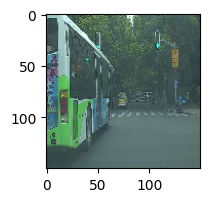

In [ ]:
loss_metric = model_vgg.evaluate(x_test,y_test)
print(loss_metric)
image_number = 12

plt.figure(figsize=(2,2))
plt.imshow(x_test[image_number][:,:,::-1])

VGGpredicted_label = pred = model_vgg.predict(x_test[image_number].reshape(1, 150, 150, 3))
VGGpredicted_class_index = VGGpredicted_label.argmax()
VGGpredicted_class_name = le.inverse_transform([VGGpredicted_class_index])

print('predicted label is ',VGGpredicted_class_name[0])

### 6.2.5 Confusion Matrix

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


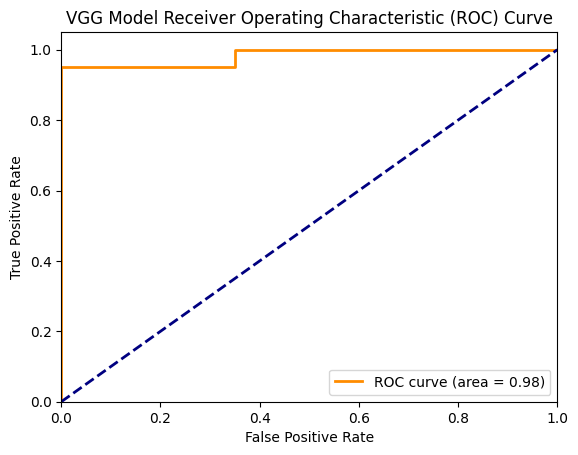

Confusion Matrix:
[[20  0]
 [ 2 18]]


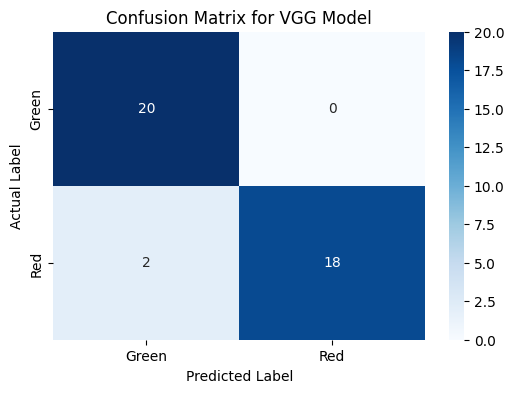

In [ ]:
# Get predictions for the entire test set using the VGG model
y_pred_probs_vgg = model_vgg.predict(x_test)
y_pred_classes_vgg = np.argmax(y_pred_probs_vgg, axis=1)

# Convert one-hot encoded y_test to class labels (0 or 1)
y_true_classes_vgg = np.argmax(y_test, axis=1)

plot_roc_curve(y_test, y_pred_probs_vgg, "VGG Model")
display_confusion_matrix(y_true_classes_vgg, y_pred_classes_vgg, "VGG Model", target_names=le.classes_)

In [ ]:
print(classification_report(y_true_classes_vgg, y_pred_classes_vgg))
print("Accuracy:", accuracy_score(y_true_classes_vgg, y_pred_classes_vgg))
print("F1_score:",f1_score(y_true_classes_vgg, y_pred_classes_vgg, average='weighted'))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      0.90      0.95        20

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40

Accuracy: 0.95
F1_score: 0.949874686716792


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted label for image 0: Red


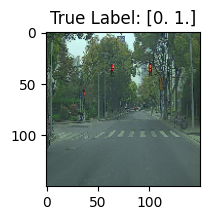

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted label for image 1: Red


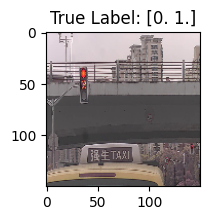

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted label for image 2: Red


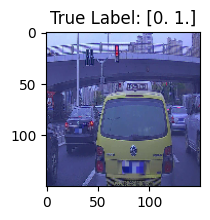

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted label for image 3: Red


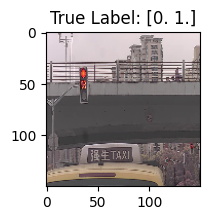

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted label for image 4: Green


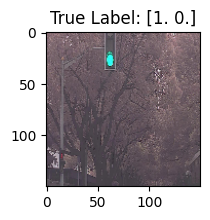

In [ ]:
for i in range(len(TX)):
    plt.figure(figsize=(2,2))
    plt.imshow(TX[i][:,:,::-1])
    plt.title(f"True Label: {TZ[i]}")
    VGGPredicted_label = model_vgg.predict(TX[i].reshape(1, 150, 150, 3))
    VGGPredicted_class_index = VGGPredicted_label.argmax()
    VGGPredicted_class_name = le.inverse_transform([VGGPredicted_class_index])
    print(f'Predicted label for image {i}: {VGGPredicted_class_name[0]}')
    plt.show()

# Comparison

In [ ]:
import pandas as pd

results_df = pd.DataFrame([
    {k: v for k, v in cnn_baseline_results.items() if k != 'Model_Object' and k != 'Confusion_Matrix'},
    {k: v for k, v in cnn_tuned1_results.items() if k != 'Model_Object' and k != 'Confusion_Matrix'},
    {k: v for k, v in cnn_vgg_results.items() if k != 'Model_Object' and k != 'Confusion_Matrix'}

])

print('='*100)
print('MODEL COMPARISON')
print('='*100)
print(results_df.to_string(index=False))

best_acc_idx = results_df['Accuracy'].idxmax()
print(f'\nBest Accuracy: {results_df.loc[best_acc_idx, "Model"]} = {results_df.loc[best_acc_idx, "Accuracy"]:.4f}')
print(f'   F1-Score: {results_df.loc[best_acc_idx, "F1_Score"]:.4f}')


MODEL COMPARISON
         Model  Accuracy  Precision  Recall  F1_Score  ROC_AUC
Baseline Model     0.675   0.705882     0.6  0.673162   0.7625
 Tuned Model 1     0.825   0.933333     0.7  0.822222   0.9575
 Tuned Model 2     0.950   1.000000     0.9  0.949875   0.9825

Best Accuracy: Tuned Model 2 = 0.9500
   F1-Score: 0.9499


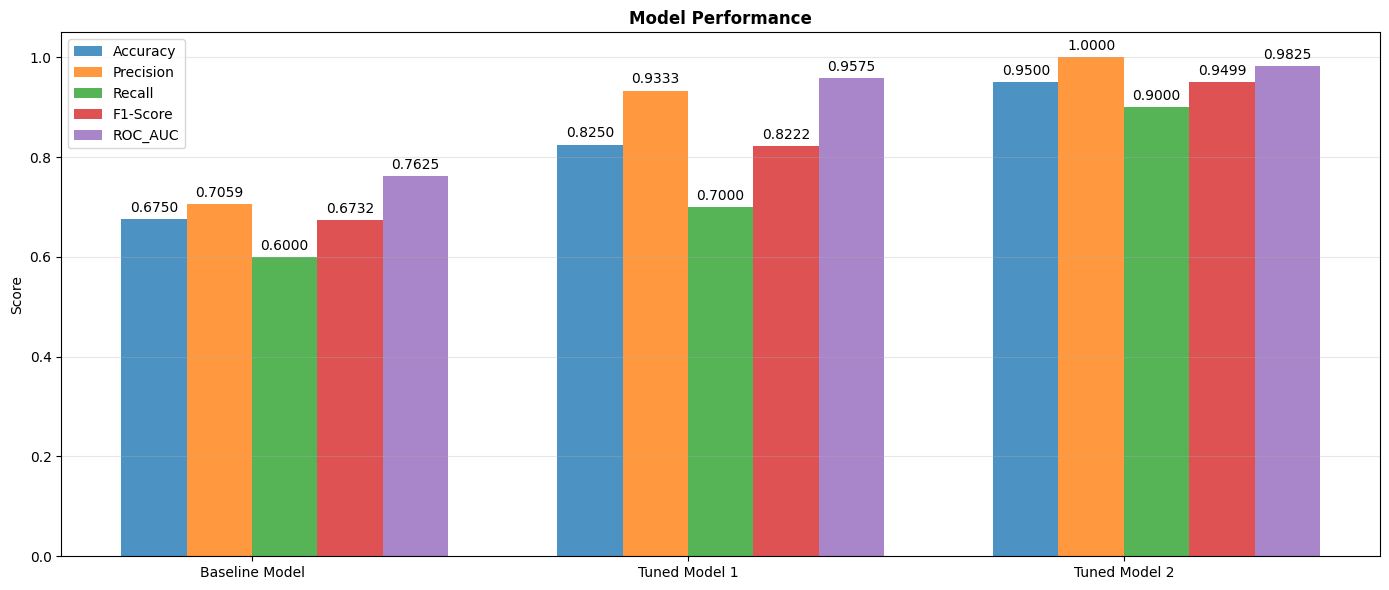

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
x = np.arange(len(results_df))
width = 0.15

bars1 = ax.bar(x - width*1.5, results_df['Accuracy'], width, label='Accuracy', alpha=0.8)
bars2 = ax.bar(x - width*0.5, results_df['Precision'], width, label='Precision', alpha=0.8)
bars3 = ax.bar(x + width*0.5, results_df['Recall'], width, label='Recall', alpha=0.8)
bars4 = ax.bar(x + width*1.5, results_df['F1_Score'], width, label='F1-Score', alpha=0.8)
bars5 = ax.bar(x + width*2.5, results_df['ROC_AUC'], width, label='ROC_AUC', alpha=0.8)


# Add value labels on each bar
ax.bar_label(bars1, fmt='%.4f', padding=3)
ax.bar_label(bars2, fmt='%.4f', padding=3)
ax.bar_label(bars3, fmt='%.4f', padding=3)
ax.bar_label(bars4, fmt='%.4f', padding=3)
ax.bar_label(bars5, fmt='%.4f', padding=3)

ax.set_xticks(x)
ax.set_xticklabels(results_df['Model'])
ax.set_ylabel('Score')
ax.set_title('Model Performance', fontweight='bold')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

results_accuracy_df = pd.DataFrame([
    {k: v for k, v in baseline_accuracy_map.items() if k != 'Model_Object'},
    {k: v for k, v in tuned1_accuracy_map.items() if k != 'Model_Object'},
    {k: v for k, v in vgg_accuracy_map.items() if k != 'Model_Object'}

])

print('='*100)
print('MODEL COMPARISON')
print('='*100)
print(results_accuracy_df.to_string(index=False))

#best_acc_idx = results_accuracy_df['Test Accuracy'].idxmax()
#print(f'\nBest Accuracy: {results_accuracy_df.loc[best_acc_idx, "Model"]} = {results_accuracy_df.loc[best_acc_idx, "Test Accuracy"]}')
#print(f'   Best Validation Accuracy: {results_accuracy_df.loc[best_acc_idx, "Best Validation Accuracy"]:.4f}')


MODEL COMPARISON
         Model  Test Accuracy  Best Training Accuracy  Final Training Accuracy  Best Validation Accuracy  Epochs Trained
Baseline Model          0.675                0.993056                 0.979167                     0.750              27
 Tuned Model 1          0.825                0.916667                 0.902778                     0.750              93
 Tuned Model 2          0.950                1.000000                 1.000000                     0.875              56


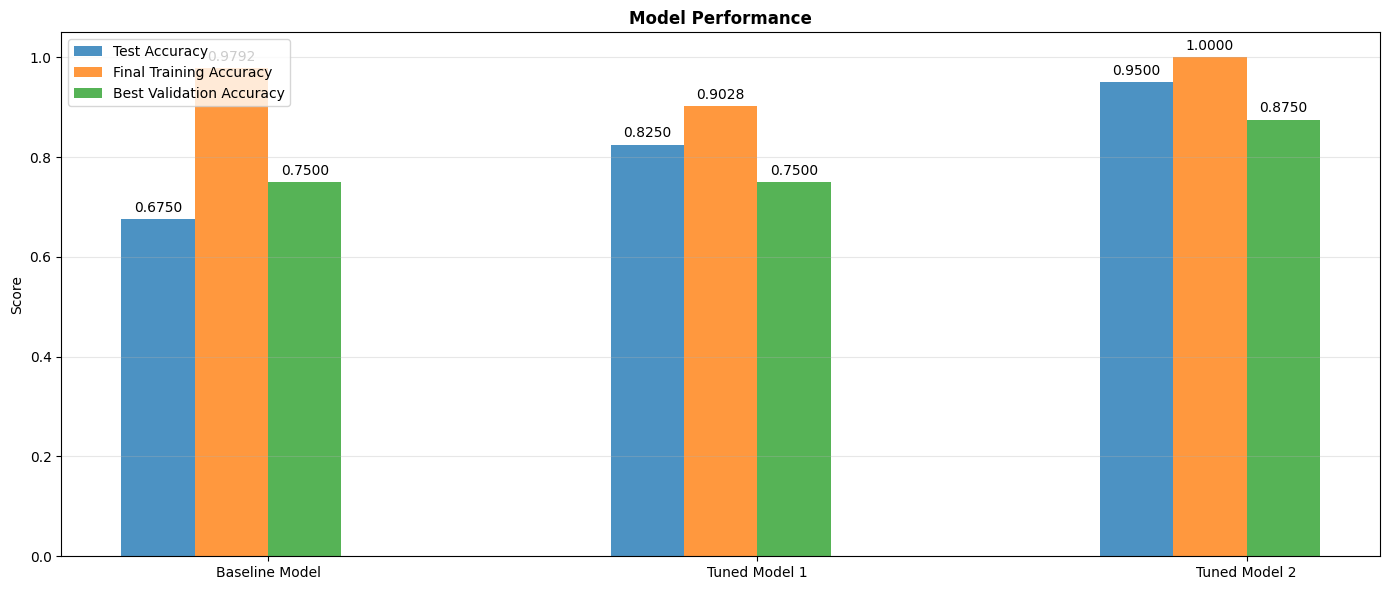

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
x = np.arange(len(results_accuracy_df))
width = 0.15

# Convert relevant columns to numeric before plotting
numeric_cols = ['Test Accuracy', 'Final Training Accuracy', 'Best Validation Accuracy']
for col in numeric_cols:
    results_accuracy_df[col] = pd.to_numeric(results_accuracy_df[col])

bars1 = ax.bar(x - width*1.5, results_accuracy_df['Test Accuracy'], width, label='Test Accuracy', alpha=0.8)
bars2 = ax.bar(x - width*0.5, results_accuracy_df['Final Training Accuracy'], width, label='Final Training Accuracy', alpha=0.8)
bars3 = ax.bar(x + width*0.5, results_accuracy_df['Best Validation Accuracy'], width, label='Best Validation Accuracy', alpha=0.8)
#bars4 = ax.bar(x + width*1.5, results_accuracy_df['F1_Score'], width, label='F1-Score', alpha=0.8)
#bars5 = ax.bar(x + width*2.5, results_accuracy_df['ROC_AUC'], width, label='ROC_AUC', alpha=0.8)


# Add value labels on each bar
ax.bar_label(bars1, fmt='%.4f', padding=3)
ax.bar_label(bars2, fmt='%.4f', padding=3)
ax.bar_label(bars3, fmt='%.4f', padding=3)
#ax.bar_label(bars4, fmt='%.4f', padding=3)
#ax.bar_label(bars5, fmt='%.4f', padding=3)

ax.set_xticks(x)
ax.set_xticklabels(results_accuracy_df['Model'])
ax.set_ylabel('Score')
ax.set_title('Model Performance', fontweight='bold')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# End Coursework 2